In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('max_colwidth', 5000)
import pandas_profiling
from IPython.display import display
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

## Load Data From CSV File

First thing is merging the csv file into one file <br />
Here is the code:
`cat *.csv >merged.csv`
<br/>
**Note:** to read the csv file in, need to do `skiprows=1` and `low_memory=False`

<br/>
Next, take a look at the data. Simple command to explore the data so I can explore over time

In [2]:
df_backup = pd.read_csv('merged.csv', skiprows=1, low_memory=False)

In [3]:
df = df_backup.copy()

In [4]:
def explore_data(dataframe):
    print('The number of rows is {:,} and the number of columns is {:,}'.format(dataframe.shape[0], dataframe.shape[1]))

In [5]:
explore_data(df)

The number of rows is 2,384,848 and the number of columns is 150


### First Modification
Since I have the merged `.csv` files, I need to drop the redundant rows
<br/>
There should be 16 of them

In [6]:
df = df[df.id!='id'] # leave behind those that do not have id in the id column
# due to csv merge, need to eliminate rows with redundant index; 16 of these

### Next, Check Loan Status
Want to see loan_status counts

In [7]:
df.loan_status.value_counts()

Fully Paid                                             1191125
Current                                                 868848
Charged Off                                             287174
Late (31-120 days)                                       20775
In Grace Period                                           9242
Late (16-30 days)                                         4826
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     42
Name: loan_status, dtype: int64

In [8]:
print("Charged off loans as a % of total: {:.1%}".format(287174/2384848))

Charged off loans as a % of total: 12.0%


In [9]:
print("Fully Paid loans as a % of total: {:.1%}".format(1191125/2384848))

Fully Paid loans as a % of total: 49.9%


In [10]:
print("Current loans as a % of total: {:.1%}".format(868848/2384848))

Current loans as a % of total: 36.4%


### Multiple DataFrames
I will create a series of dataframes based on factors that I can then work with and combine rather than one big monolith
<br/>
First is the hardship dataframe to include all hardship columns

In [11]:
df_hardship = df[['loan_amnt','issue_d','funded_amnt','term','int_rate','grade','loan_status','hardship_flag','hardship_status','deferral_term','hardship_amount','hardship_length','hardship_loan_status','hardship_payoff_balance_amount']]

In [12]:
df_hardship.hardship_loan_status.value_counts()

Late (16-30 days)     5015
In Grace Period       3221
Current               2803
Late (31-120 days)     497
Issued                   4
Name: hardship_loan_status, dtype: int64

How many of these hardship loans were late 16-30 days? `5,015`
<br/>

So then let's take a look at them

<br/>
Then I can see how many actually Defaulted

In [13]:
df_late_hardship = df_hardship.loc[df_hardship['hardship_loan_status'] == 'Late (16-30 days)']

In [14]:
df_late_hardship

loan_amnt   issue_d funded_amnt        term int_rate grade  \
48684       35000  Dec-2013       35000   60 months   15.61%     C   
51790       10000  Dec-2013       10000   60 months   14.98%     C   
53084       11650  Dec-2013       11650   60 months   25.99%     G   
54133       12000  Dec-2013       12000   60 months   18.55%     D   
57616       22100  Nov-2013       22100   60 months   15.61%     C   
59916       12000  Nov-2013       12000   60 months   21.70%     E   
68535       24000  Nov-2013       24000   60 months   19.52%     D   
72528       10000  Oct-2013       10000   60 months   20.20%     D   
77047       22000  Oct-2013       22000   60 months   18.55%     D   
77726       10000  Oct-2013       10000   60 months   21.70%     E   
81867       11500  Oct-2013       11500   60 months   19.52%     D   
85765       24000  Oct-2013       24000   60 months   16.20%     C   
93532       20000  Sep-2013       20000   60 months    9.71%     B   
93884       17000  Sep-2013       17000   60 months   15.22%     C   
96711       31300  Sep-2013       31300   60 months   22.20%     E   
98157       21000  Sep-2013       21000   60 months   16.78%     C   
98503       35000  Sep-2013       35000   60 months   21.15%     E   
100950      15000  Aug-2013       15000   60 months   20.80%     E   
101691      14125  Aug-2013       14125   60 months   17.56%     D   
107407      21000  Aug-2013       21000   60 months   16.78%     C   
111811      18000  Aug-2013       18000   60 months   22.70%     E   
120680      16000  Jul-2013       16000   60 months   22.20%     E   
125406      35000  Jul-2013       35000   60 months   21.00%     E   
130051      15000  Jun-2013       15000   60 months   16.29%     C   
130195      24000  Jun-2013       24000   60 months   23.63%     F   
134906      20000  May-2013       20000   60 months   23.63%     F   
143692      32875  May-2013       32875   60 months   21.00%     E   
143813      35000  May-2013       35000   60 months   21.98%     E   
146472      20000  Apr-2013       20000   60 months   16.29%     C   
149449      20000  Apr-2013       20000   60 months   15.80%     C   
163030      25000  Feb-2013       25000   60 months   19.72%     D   
177567      19200  Dec-2012       19200   60 months   17.77%     D   
180221      19125  Dec-2012       19125   60 months   16.29%     C   
187905      35000  Nov-2012       35000   60 months   24.83%     G   
230859      13825  Dec-2014       13825   60 months   13.66%     C   
231912      12000  Dec-2014       12000   60 months   14.31%     C   
233292      10775  Dec-2014       10775   60 months   13.66%     C   
234117      20000  Dec-2014       20000   60 months   10.49%     B   
234151      14075  Dec-2014       14075   60 months   19.99%     E   
234456      18600  Dec-2014       18600   60 months   17.86%     D   
234758      13000  Dec-2014       13000   60 months   17.86%     D   
235098      19200  Dec-2014       19200   60 months   15.59%     D   
235136      15000  Dec-2014       15000   60 months   10.49%     B   
235237      16000  Dec-2014       16000   60 months   15.59%     D   
236018      16000  Dec-2014       16000   36 months   10.49%     B   
237300      18825  Dec-2014       18825   60 months   17.14%     D   
237978      24625  Dec-2014       24625   60 months   17.86%     D   
238585      15350  Dec-2014       15350   60 months   23.99%     F   
238822      20000  Dec-2014       20000   60 months   13.66%     C   
240269      18000  Nov-2014       18000   60 months    8.19%     A   
240512      12150  Nov-2014       12150   36 months   13.66%     C   
240893      24000  Nov-2014       24000   60 months   16.49%     D   
242287      22375  Nov-2014       22375   60 months   20.99%     E   
242756      20000  Nov-2014       20000   36 months   12.39%     C   
243332      18550  Nov-2014       18550   60 months   19.99%     E   
243579      12000  Nov-2014       12000   60 months   10.49%     B   
244686      11200 

In [15]:
df_late_hardship[df_late_hardship.loan_status=='Default']

loan_amnt   issue_d funded_amnt        term int_rate grade  \
51790       10000  Dec-2013       10000   60 months   14.98%     C   
1529147     35000  Dec-2017       35000   36 months   14.08%     C   

        loan_status hardship_flag hardship_status deferral_term  \
51790       Default             N       COMPLETED             3   
1529147     Default             N       COMPLETED             3   

        hardship_amount hardship_length hardship_loan_status  \
51790             38.02               3    Late (16-30 days)   
1529147          303.08               3    Late (16-30 days)   

        hardship_payoff_balance_amount  
51790                          3126.02  
1529147                       26382.01

# Preprocessing

Below is the preprocessing to clean up the CSV file

What may be a good strategy here is to analyze columns in bunches of ten and then determine which to keep and which to drop - that should make it more manageable

In [6]:
df[df['id']=='id']
# No need to rerun this cell since I already dropped all this

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
42539    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
230724   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
466357   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
887456   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1021347  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1119205  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1218329  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1321879  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1418662  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1524117  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1642769  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1750637  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1881413  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
2009611  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
2138027  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
2253706  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   

         int_rate  installment  grade  sub_grade  emp_title  emp_length  \
42539    int_rate  installment  grade  sub_grade  emp_title  emp_length   
230724   int_rate  installment  grade  sub_grade  emp_title  emp_length   
466357   int_rate  installment  grade  sub_grade  emp_title  emp_length   
887456   int_rate  installment  grade  sub_grade  emp_title  emp_length   
1021347  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1119205  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1218329  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1321879  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1418662  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1524117  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1642769  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1750637  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1881413  int_rate  installment  grade  sub_grade  emp_title  emp_length   
2009611  int_rate  installment  grade  sub_grade  emp_title  emp_length   
2138027  int_rate  installment  grade  sub_grade  emp_title  emp_length   
2253706  int_rate  installment  grade  sub_grade  emp_title  emp_length   

         home_ownership  annual_inc  verification_status  issue_d  \
42539    home_ownership  annual_inc  verification_status  issue_d   
230724   home_ownership  annual_inc  verification_status  issue_d   
466357   home_ownership  annual_inc  verification_status  issue_d   
887456   home_ownership  annual_inc  verification_status  issue_d   
1021347  home_ownership  annual_inc  verification_status  issue_d   
1119205  home_ownership  annual_inc  verification_status  issue_d   
1218329  home_ownership  annual_inc  verification_status  issue_d   
1321879  home_ownership  annual_inc  verification_status  issue_d   
1418662  home_ownership  annual_inc  verification_status  issue_d   
1524117  home_ownership  annual_inc  verification_status  issue_d   
1642769  home_ownership  annual_inc  verification_status  issue_d   
1750637  home_ownership  annual_inc  verification_status  issue_d   
1881413  home_ownership  annual_inc  verification_status  issue_d   
2009611  home_ownership  annual_inc  verification_status  issue_d   
2138027  home_ownership  annual_inc  verification_status  issue_d   
2253706  home_ownership  annual_inc  verification_status  issue_d   

         loan_status  pymnt_plan  url  desc  purpose  title  zip_code  \
42539    loan_status  pymnt_plan  url  desc  purpose  title  zip_code   
230724   loan_status  pymnt_plan  url  desc  purpose  title  zip_code   
466357   loan_status  pymnt_plan  url  desc  purpose  title  zip_code   
887456   loan_status  pym

In [16]:
df = df.drop(['url','desc','member_id','orig_projected_additional_accrued_interest'],axis=1) 
# drop a couple of easy columns

In [17]:
df = df.drop(['fico_range_low','fico_range_high','sec_app_fico_range_low','sec_app_fico_range_high','last_fico_range_high','last_fico_range_low'],axis=1) 
# also drop these fico score columns since this is going to be calculated

In [18]:
df.head(2)

id loan_amnt funded_amnt funded_amnt_inv        term int_rate  \
0  1077501      5000        5000            4975   36 months   10.65%   
1  1077430      2500        2500            2500   60 months   15.27%   

  installment grade sub_grade emp_title emp_length home_ownership annual_inc  \
0      162.87     B        B2       NaN  10+ years           RENT      24000   
1       59.83     C        C4     Ryder   < 1 year           RENT      30000   

  verification_status   issue_d  loan_status pymnt_plan      purpose  \
0            Verified  Dec-2011   Fully Paid          n  credit_card   
1     Source Verified  Dec-2011  Charged Off          n          car   

      title zip_code addr_state    dti delinq_2yrs earliest_cr_line  \
0  Computer    860xx         AZ  27.65           0         Jan-1985   
1      bike    309xx         GA      1           0         Apr-1999   

  inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc  \
0              1                    NaN                    NaN        3   
1              5                    NaN                    NaN        3   

  pub_rec revol_bal revol_util total_acc initial_list_status out_prncp  \
0       0     13648      83.7%         9                   f      0.00   
1       0      1687       9.4%         4                   f      0.00   

  out_prncp_inv      total_pymnt total_pymnt_inv total_rec_prncp  \
0          0.00  5863.1551866952         5833.84         5000.00   
1          0.00          1014.53         1014.53          456.46   

  total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                0.0        0.0                     0.0   
1        435.17                0.0      122.9                    1.11   

  last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Jan-2015          171.62          NaN           May-2019   
1     Apr-2013          119.66          NaN           Oct-2016   

  collections_12_mths_ex_med mths_since_last_major_derog policy_code  \
0                          0                         NaN           1   
1                          0                         NaN           1   

  application_type annual_inc_joint dti_joint verification_status_joint  \
0       Individual              NaN       NaN                       NaN   
1       Individual              NaN       NaN                       NaN   

  acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m  \
0              0          NaN         NaN         NaN         NaN         NaN   
1              0          NaN         NaN         NaN         NaN         NaN   

  open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m  \
0         NaN                NaN          NaN     NaN         NaN         NaN   
1         NaN                NaN          NaN     NaN         NaN         NaN   

  max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0        NaN      NaN              NaN    NaN         NaN          NaN   
1        NaN      NaN              NaN    NaN         NaN          NaN   

  acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util  \
0                  NaN         NaN            NaN     NaN   
1                  NaN         NaN            NaN     NaN   

  chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct  \
0                        0           0                NaN   
1                        0           0                NaN   

  mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc  \
0                  NaN                   NaN            NaN      NaN   
1                  NaN                   NaN            NaN      NaN   

  mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq  \
0                  NaN                      NaN                   NaN   
1                  NaN                      NaN                   NaN   

  mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl  \
0          

In [19]:
convert_to_numeric = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','hardship_amount','hardship_last_payment_amount','hardship_payoff_balance_amount','settlement_amount','revol_bal_joint','dti_joint','annual_inc_joint']
# known to be easy conversion to numeric

In [20]:
for items in convert_to_numeric:
    df[items] = pd.to_numeric(df[items])

In [21]:
def missing_values(dataframe,column):
    # print(dataframe[dataframe[column].isnull()])
    dataframe = dataframe[dataframe[column].notnull()]
    return dataframe

In [22]:
df = missing_values(df,'loan_amnt') 

In [23]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Default',
       'Current', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)'], dtype=object)

In [24]:
df.shape
# dropped another 51 from loan_amnt

(2384781, 140)

### Employment Length Preprocessing

In [25]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [26]:
def emp_length(dataframe,column):
    dataframe[column+'_int'] = dataframe[column]
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace('\+ years','')
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace('< 1 year',str(0))
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace('n\a',str(0))
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace(' years','')
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace(' year','')
    dataframe[column+'_int'] = pd.to_numeric(dataframe[column+'_int'])

In [27]:
emp_length(df,'emp_length')

In [28]:
df.emp_length_int.fillna(0, inplace=True)
# doing this instead of notnull because that drops the rows and this just replaces the nan with zero
# question is does this make sense

In [29]:
df.emp_length_int.unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [30]:
df.shape

(2384781, 141)

### Term Preprocessing

In [31]:
df['term_int'] = df['term'].str.replace(' months','')

In [32]:
df['term_int'] = pd.to_numeric(df['term_int'])

Check to make sure converted this properly

In [33]:
df['term_int'].value_counts()

36    1688390
60     696391
Name: term_int, dtype: int64

### Earliest Credit Line Preprocessing

In [34]:
df[df['earliest_cr_line'].isna()] # should be 29 rows with null

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
42450  79967     5000.0       5000.0           3025.0   36 months    7.43%   
42451  79924     7000.0       7000.0           3450.0   36 months    7.75%   
42460  71823     4350.0       4350.0            825.0   36 months    8.07%   
42473  72197     3900.0       3900.0           2025.0   36 months    9.33%   
42481  79893     6700.0       6700.0           6700.0   36 months    7.75%   
42484  73003     3200.0       3200.0           2000.0   36 months    9.96%   
42495  72819     7200.0       5075.0            350.0   36 months   10.28%   
42510  91023     1900.0       1900.0            900.0   36 months    9.64%   
42515  85961     1200.0       1200.0            500.0   36 months    9.01%   
42516  85818     5000.0       5000.0            375.0   36 months   11.22%   
42517  85781     1400.0       1400.0            475.0   36 months   10.91%   
42518  85675     1000.0       1000.0            625.0   36 months   14.07%   
42519  84670     5000.0       5000.0            300.0   36 months    7.75%   
42520  84098     2500.0       2500.0            225.0   36 months    7.43%   
42521  83979     3000.0       3000.0            250.0   36 months    7.43%   
42522  83489     2600.0       2600.0            575.0   36 months    8.38%   
42523  83185     1000.0       1000.0            625.0   36 months    7.12%   
42524  74014     6450.0       6450.0              0.0   36 months   11.22%   
42525  76629     1275.0       1275.0              0.0   36 months   12.49%   
42526  81085    10500.0      10500.0            275.0   36 months   11.22%   
42527  77792     3000.0       3000.0            125.0   36 months    9.01%   
42528  77757     3000.0       3000.0              0.0   36 months    9.33%   
42529  74505     2000.0       2000.0            225.0   36 months    9.96%   
42530  74323     6500.0       6500.0              0.0   36 months    9.64%   
42531  73582     3500.0       3500.0            225.0   36 months   10.28%   
42532  72998     1000.0       1000.0              0.0   36 months    9.64%   
42533  72176     2525.0       2525.0            225.0   36 months    9.33%   
42534  71623     6500.0       6500.0              0.0   36 months    8.38%   
42535  70686     5000.0       5000.0              0.0   36 months    7.75%   

       installment grade sub_grade  \
42450       155.38     A        A2   
42451       218.55     A        A3   
42460       136.45     A        A4   
42473       124.62     B        B3   
42481       209.18     A        A3   
42484       103.20     B        B5   
42495       164.42     C        C1   
42510        61.00     B        B4   
42515        38.17     B        B2   
42516       164.23     C        C4   
42517        45.78     C        C3   
42518        34.21     E        E3   
42519       156.11     A        A3   
42520        77.69     A        A2   
42521        93.23     A        A2   
42522        81.94     A        A5   
42523        30.94     A        A1   
42524       211.85     C        C4   
42525        42.65     D        D3   
42526       344.87     C        C4   
42527        95.42     B        B2   
42528        95.86     B        B3   
42529        64.50     B        B5   
42530       208.66     B        B4   
42531       113.39     C        C1   
42532        32.11     B        B4   
42533        80.69     B        B3   
42534       204.84     A        A5   
42535       156.11     A        A3   

                                           emp_title emp_length  \
42450                                            NaN   < 1 year   
42451                                            NaN   < 1 year   
42460                                            NaN   < 1 year   
42473                                            NaN   < 1 year   
42481                                            NaN   < 1 year   
42484                                            NaN   < 1 year   
42495                                            NaN   < 1 

Seems like they are all in loan_status "Does not meet the credit policy. Status: Fully Paid"
<br/>If all of them are fully paid, then I can exclude them from the transformation so need to check that

In [35]:
df = df[df.earliest_cr_line.notnull()]

In [36]:
df.earliest_cr_line.unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Jan-1996',
       'Nov-2004', 'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004',
       'Jan-1998', 'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007',
       'Oct-1998', 'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997',
       'Feb-1983', 'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002',
       'Aug-1984', 'Nov-2006', 'Dec-1987', 'Nov-1981', 'Feb-1997',
       'Apr-2005', 'Oct-2007', 'Dec-2000', 'Apr-2007', 'Dec-2001',
       'Jan-2003', 'Mar-1994', 'Sep-1998', 'Jun-2004', 'Nov-1995',
       'Jul-1999', 'Jun-1995', 'Sep-1992', 'Jan-2002', 'Apr-1992',
       'Oct-2006', 'May-2000', 'Dec-1998', 'Dec-2004', 'Oct-2000',
       'May-2002', 'May-2006', 'Jul-2002', 'Jul-2006', 'May-1997',
       'Oct-2005', 'Apr-1995', 'Oct-2002', 'Jan-2000', 'Apr-2000',
       'Dec-1994', 'Sep-2005', 'Dec-1984', 'Dec-1999', 'Nov-2003',
       'Jun-1989', 'Jun-2003', 'Oct-1996', 'May-2003', 'Jun-2002',
       'Jun-2007', 'Dec-1996', 'Feb-1984', 'Sep-2002', 'Jan-19

In [37]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'],format = '%b-%Y')

In [38]:
pd.to_datetime('2019-8-01') - df['earliest_cr_line_date'][-10:] 
# this is just a check

2384836    4017 days
2384837    5600 days
2384838   10470 days
2384839    5539 days
2384840    6056 days
2384841    6390 days
2384842    7762 days
2384843    5691 days
2384844   10896 days
2384845    7061 days
Name: earliest_cr_line_date, dtype: timedelta64[ns]

In [39]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2019-8-01')-df['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [40]:
min(df['mths_since_earliest_cr_line'])
# check to make sure min value is not negative

39.0

### Need to do the same transformation for 'issue_date'

In [41]:
# Assume we are now in August 2019
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%Y')
# Extracts the date and the time from a string variable that is in a given format.
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2019-8-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

### For `total_rev_hi_lim` need to fill the na with the funded amnt
They are effectively the same thing

In [42]:
df.total_rev_hi_lim.fillna(df['funded_amnt'], inplace=True)

### Do similar for `annual_inc`

In [43]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
# fill the missing values with the mean value of the non-missing values.

In [44]:
df.loan_status.value_counts()

Fully Paid                                             1191125
Current                                                 868848
Charged Off                                             287174
Late (31-120 days)                                       20775
In Grace Period                                           9242
Late (16-30 days)                                         4826
Does not meet the credit policy. Status:Fully Paid        1962
Does not meet the credit policy. Status:Charged Off        758
Default                                                     42
Name: loan_status, dtype: int64

### Create a `good_bad` column for items where loan status is "bad"

In [45]:
df['good_bad'] = np.where(df.loan_status.isin(['Charged Off','Default','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)','Late (16-30 days)']),0,1)

In [46]:
df.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   

   installment grade sub_grade emp_title emp_length home_ownership  \
0       162.87     B        B2       NaN  10+ years           RENT   
1        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status   issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-2011   Fully Paid          n   
1     30000.0     Source Verified  Dec-2011  Charged Off          n   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65          0.0   
1          car      bike    309xx         GA   1.00          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   
1         Apr-1999             5.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN       3.0      0.0    13648.0      83.7%        9.0   
1                     NaN       3.0      0.0     1687.0       9.4%        4.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1014.530000          1014.53   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0         0.0   
1           456.46         435.17                 0.0       122.9   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00     Jan-2015           171.62          NaN   
1                     1.11     Apr-2013           119.66          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0           May-2019                         0.0                          NaN   
1           Oct-2016                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0          1.0       Individual               NaN        NaN   
1          1.0       Individual               NaN        NaN   

  verification_status_joint  acc_now_delinq tot_coll_amt tot_cur_bal  \
0                       NaN             0.0          NaN         NaN   
1                       NaN             0.0          NaN         NaN   

  open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il  \
0         NaN         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN         NaN                NaN   

  total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util  \
0          NaN     NaN         NaN         NaN        NaN      NaN   
1          NaN     NaN         NaN         NaN        NaN      NaN   

  total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths  \
0             5000    NaN         NaN          NaN                  NaN   
1             2500    NaN         NaN          NaN                  NaN   

  avg_cur_bal bc_open_to_buy bc_util  chargeoff_within_12_mths  delinq_amnt  \
0         NaN            NaN     NaN                       0.0          0.0   
1         NaN            NaN     NaN                       0.0          0.0   

  mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   

  mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq  \
0            NaN      NaN                  NaN                      NaN   
1            NaN      NaN                  NaN                      NaN   

  mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_12

# Before going further with my one hot encoding, need to drop irrelevant columns

In [47]:
def null_values(d):
    mis_valu = d.isnull().sum()
    mis_val_percent = 100* d.isnull().sum() / len(d)
    mis_val_table = pd.concat([mis_valu, mis_val_percent],axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(d.shape[1]) + " columns.\nThere are "+ str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

In [48]:
miss_values = null_values(df)

Dataframe has 147 columns.
There are 99 columns that have missing values.


In [49]:
miss_values.head(40)

Missing Values  % of Total Values
hardship_end_date                           2373212               99.5
payment_plan_start_date                     2373212               99.5
hardship_start_date                         2373212               99.5
hardship_amount                             2373212               99.5
deferral_term                               2373212               99.5
hardship_status                             2373212               99.5
hardship_reason                             2373212               99.5
hardship_type                               2373212               99.5
hardship_length                             2373212               99.5
hardship_last_payment_amount                2373212               99.5
hardship_dpd                                2373212               99.5
hardship_payoff_balance_amount              2373212               99.5
hardship_loan_status                        2373212               99.5
settlement_term                             2345268               98.3
debt_settlement_flag_date                   2345268               98.3
settlement_status                           2345268               98.3
settlement_date                             2345268               98.3
settlement_amount                           2345268               98.3
settlement_percentage                       2345268               98.3
sec_app_mths_since_last_major_derog         2342811               98.2
sec_app_revol_util                          2256956               94.6
revol_bal_joint                             2254769               94.5
sec_app_num_rev_accts                       2254768               94.5
sec_app_chargeoff_within_12_mths            2254768               94.5
sec_app_open_acc                            2254768               94.5
sec_app_collections_12_mths_ex_med          2254768               94.5
sec_app_mort_acc                            2254768               94.5
sec_app_inq_last_6mths                      2254768               94.5
sec_app_open_act_il                         2254768               94.5
sec_app_earliest_cr_line                    2254768               94.5
verification_status_joint                   2251157               94.4
dti_joint                                   2242083               94.0
annual_inc_joint                            2242079               94.0
mths_since_last_record                      2016958               84.6
mths_since_recent_bc_dlq                    1845573               77.4
mths_since_last_major_derog                 1783439               74.8
mths_since_recent_revol_delinq              1615607               67.7
next_pymnt_d                                1478299               62.0
mths_since_last_delinq                      1237571               51.9
il_util                                     1087696               45.6

In [50]:
vars_w_na = [var for var in df.columns if df[var].isnull().mean()>0]

In [51]:
vars_w_na

['emp_title',
 'emp_length',
 'title',
 'zip_code',
 'dti',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl

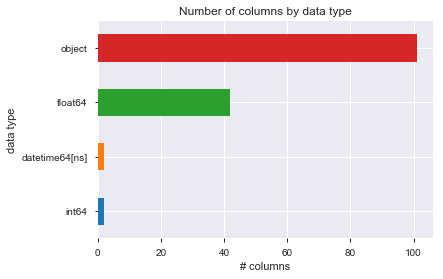

In [52]:
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns by data type')
plt.xlabel("# columns")
plt.ylabel("data type");

In [53]:
df.select_dtypes('float64').apply(pd.Series.nunique, axis=0)

loan_amnt                            1572
funded_amnt                          1572
funded_amnt_inv                     10059
installment                         94834
annual_inc                          92753
dti                                 11557
delinq_2yrs                            35
inq_last_6mths                         28
mths_since_last_delinq                175
mths_since_last_record                129
open_acc                               90
pub_rec                                41
revol_bal                          105050
total_acc                             154
out_prncp                          368971
out_prncp_inv                      380233
total_pymnt                       1717221
total_pymnt_inv                   1358671
total_rec_prncp                    498366
total_rec_int                      653879
total_rec_late_fee                  19707
recoveries                         146114
collection_recovery_fee            162258
last_pymnt_amnt                   

In [54]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

term_int    2
good_bad    2
dtype: int64

In [55]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

id                                     2384752
term                                         2
int_rate                                   688
grade                                        7
sub_grade                                   35
emp_title                               529167
emp_length                                  11
home_ownership                               6
verification_status                          3
issue_d                                    142
loan_status                                  9
pymnt_plan                                   2
purpose                                     14
title                                    63141
zip_code                                   957
addr_state                                  51
earliest_cr_line                           760
revol_util                                1428
initial_list_status                          2
last_pymnt_d                               142
next_pymnt_d                               104
last_credit_p

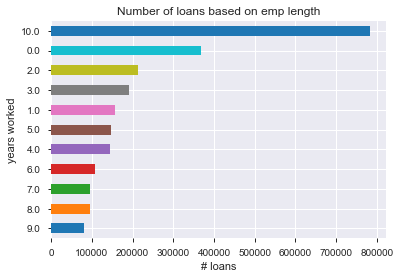

In [56]:
df['emp_length_int'].value_counts().sort_values().plot(kind='barh')
plt.title('Number of loans based on emp length')
plt.xlabel('# loans')
plt.ylabel('years worked');

# One Hot Encoding

Here is my list for one_hot encoding

list_dummies = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'initial_list_status']

In [57]:
df.shape

(2384752, 147)

In [58]:
lst = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status']
def loan_data_d(dataframe, lst = []):
    for items in lst:
        loan_data_dummies = [pd.get_dummies(dataframe[items], prefix=items,prefix_sep=':')]
        loan_data_dummies = pd.concat(loan_data_dummies, axis=1)
        dataframe = pd.concat([dataframe, loan_data_dummies], axis = 1)
    return dataframe
    # I think I can run this in the format below but will need to test it out 
    # think issue is I need to then concatenate to the original dataframe

In [59]:
df = loan_data_d(df,lst)
# this takes time to run

In [60]:
df.shape

(2384752, 274)

## Missing Values

In [61]:
df.isnull().sum()

id                                                                       0
loan_amnt                                                                0
funded_amnt                                                              0
funded_amnt_inv                                                          0
term                                                                     0
int_rate                                                                 0
installment                                                              0
grade                                                                    0
sub_grade                                                                0
emp_title                                                           196690
emp_length                                                          161046
home_ownership                                                           0
annual_inc                                                               0
verification_status      

In [62]:
df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   

   installment grade sub_grade emp_title emp_length home_ownership  \
0       162.87     B        B2       NaN  10+ years           RENT   

   annual_inc verification_status   issue_d loan_status pymnt_plan  \
0     24000.0            Verified  Dec-2011  Fully Paid          n   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN       3.0      0.0    13648.0      83.7%        9.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           5000.0         863.16                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Jan-2015           171.62          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0           May-2019                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0          1.0       Individual               NaN        NaN   

  verification_status_joint  acc_now_delinq tot_coll_amt tot_cur_bal  \
0                       NaN             0.0          NaN         NaN   

  open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il  \
0         NaN         NaN         NaN         NaN                NaN   

  total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util  \
0          NaN     NaN         NaN         NaN        NaN      NaN   

  total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths  \
0             5000    NaN         NaN          NaN                  NaN   

  avg_cur_bal bc_open_to_buy bc_util  chargeoff_within_12_mths  delinq_amnt  \
0         NaN            NaN     NaN                       0.0          0.0   

  mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op  \
0                NaN                  NaN                   NaN   

  mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq  \
0            NaN      NaN                  NaN                      NaN   

  mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd  \
0                   NaN                            NaN                   NaN   

  num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl  \
0            NaN             NaN         NaN       NaN       NaN   

  num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m  \
0           NaN           NaN                 NaN      NaN              NaN   

  num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  \
0          NaN                NaN                NaN            NaN   

  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens tot_hi_cred_lim  \
0              NaN                   0.0        0.0             NaN   

  total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
0               NaN            NaN                        NaN   

   revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths  \
0              NaN                      NaN                    NaN   

  sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il  \
0              NaN              NaN                NaN                 NaN   

  sec_app_num_rev_accts sec_app_chargeoff_within_12_mths  \
0                   NaN                              NaN   

  sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog  \
0          

In [ ]:
lst = ['mths_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']
'''
use fill_na function here
'''
# df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
# df['acc_now_delinq'].fillna(0, inplace=True)
# df['total_acc'].fillna(0, inplace=True)
# df['pub_rec'].fillna(0, inplace=True)
# df['open_acc'].fillna(0, inplace=True)
# df['inq_last_6mths'].fillna(0, inplace=True)
# df['delinq_2yrs'].fillna(0, inplace=True)
# df['emp_length_int'].fillna(0, inplace=True)

In [88]:
lst = ['mths_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']
def fill_na(dataframe, lst):
    for items in lst:
        dataframe[items].fillna(0, inplace=True)

In [3]:
from IPython.display import display

Logistic Regression
$$ ln \left(\frac{non-default} {default}\right) = \sum_{j=1}^{m} \beta_j * X_j$$

Weight of Evidence
$$ WoE_i = ln \left(\frac{\%(y=1)_i}{\%(y=0)_i}\right) $$

Information Value
$$ IV = \sum_{i=1}^{k} \left[\left(\%(y=1)_i - \%(y=0)_i\right) * WoE_i\right] $$

# PD Model

In [63]:
df['loan_status'].value_counts() / df['loan_status'].count()
# gives proportion of each to the overall count

Fully Paid                                             0.499475
Current                                                0.364335
Charged Off                                            0.120421
Late (31-120 days)                                     0.008712
In Grace Period                                        0.003875
Late (16-30 days)                                      0.002024
Does not meet the credit policy. Status:Fully Paid     0.000823
Does not meet the credit policy. Status:Charged Off    0.000318
Default                                                0.000018
Name: loan_status, dtype: float64

# Need to make my train / test split

In [64]:
from sklearn.model_selection import train_test_split as tts

In [65]:
loan_data_input_train, loan_data_input_test, loan_data_target_train, loan_data_target_test = tts(df.drop('good_bad', axis=1), df['good_bad'], test_size=0.25, random_state=42)

In [173]:
#df_inputs_prepr, df_targets_prepr = loan_data_input_train, loan_data_target_train
df_inputs_prepr, df_targets_prepr = loan_data_input_test, loan_data_target_test

In [174]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good']/ df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    # for df use df_inputs_prepr, for discrete_variable_name use 'grade', for good_bad_variable_df use df_targets_prepr

In [175]:
df_temp = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)

In [176]:
df_temp.sort_values(by='grade')

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
6     A  123182   0.963266    0.206616  118657.0   4525.0     0.229362   
5     B  174321   0.909082    0.292393  158472.0  15849.0     0.306324   
4     C  166655   0.848651    0.279534  141432.0  25223.0     0.273386   
3     D   86081   0.789861    0.144386   67992.0  18089.0     0.131428   
2     E   33244   0.697479    0.055761   23187.0  10057.0     0.044820   
1     F   10147   0.609244    0.017020    6182.0   3965.0     0.011950   
0     G    2558   0.551994    0.004291    1412.0   1146.0     0.002729   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
6    0.057385  1.385529        0.054184  0.964148  0.505863  
5    0.200992  0.421381        0.060430  0.578409  0.505863  
4    0.319870 -0.157028        0.058791  0.399977  0.505863  
3    0.229399 -0.557005        0.092381  0.488763  0.505863  
2    0.127540 -1.045768        0.088235  0.391187  0.505863  
1    0.050283 -1.436955        0.057250  0.235406  0.505863  
0    0.014533 -1.672361             NaN       NaN  0.505863

In [177]:
def plot_by_woe(df_WoE, rotation_of_x_axis_label=0):
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o', linestyle='--',color='k')
    plt.xlabel = (df_WoE.columns[0])
    plt.ylabel = ('Weight of Evidence')
    plt.title(str('Weight of Evidence by '+ df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_label)
    # plot_by_woe(df_temp)

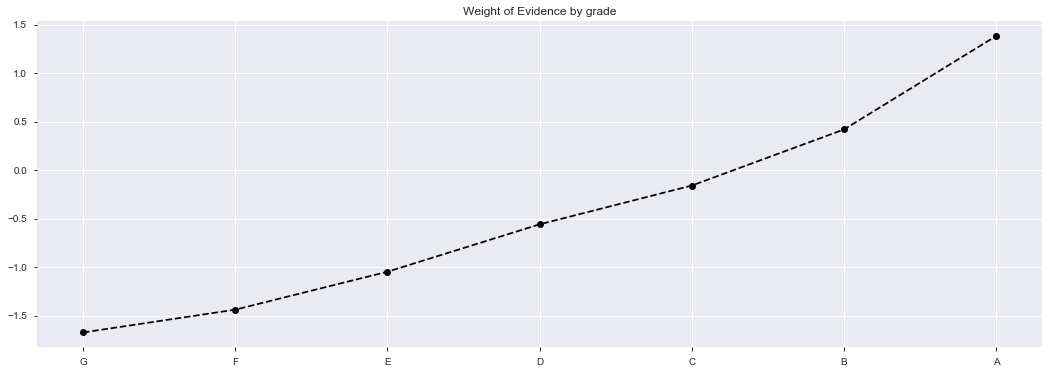

In [178]:
plot_by_woe(df_temp)

In [179]:
df_temp_2 = woe_discrete(df_inputs_prepr,'home_ownership', df_targets_prepr)

In [180]:
df_temp_2

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER      44   0.727273    0.000074      32.0     12.0   
1           NONE      13   0.846154    0.000022      11.0      2.0   
2           RENT  234711   0.846330    0.393686  198643.0  36068.0   
3            OWN   66757   0.866306    0.111973   57832.0   8925.0   
4       MORTGAGE  293853   0.884939    0.492886  260042.0  33811.0   
5            ANY     810   0.955556    0.001359     774.0     36.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.000062    0.000152 -0.900261             NaN       NaN  0.025926  
1     0.000021    0.000025 -0.176343        0.118881  0.723919  0.025926  
2     0.383974    0.457402 -0.174987        0.000176  0.001355  0.025926  
3     0.111789    0.113184 -0.012405        0.019976  0.162583  0.025926  
4     0.502658    0.428780  0.158966        0.018633  0.171371  0.025926  
5     0.001496    0.000457  1.186962        0.070616  1.027996  0.025926

In [181]:
df_inputs_prepr.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY', 'OTHER', 'NONE'], dtype=object)

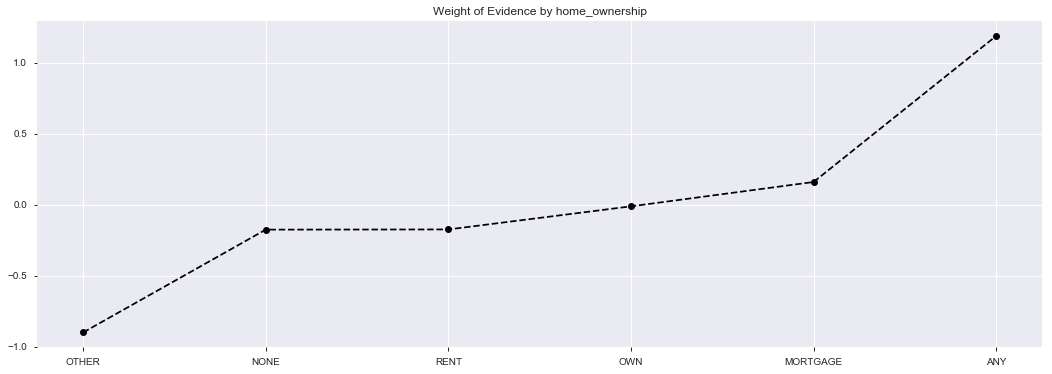

In [182]:
plot_by_woe(df_temp_2)

In [183]:
df_inputs_prepr['home_ownership:NONE_RENT_OWN_MORTGAGE'] = sum([df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OWN'],df_inputs_prepr['home_ownership:MORTGAGE']])

In [184]:
df_inputs_prepr['addr_state'].unique()

array(['KY', 'VA', 'MS', 'CA', 'GA', 'UT', 'WI', 'MD', 'FL', 'TX', 'NY',
       'AZ', 'WA', 'IL', 'TN', 'WV', 'MA', 'AR', 'PA', 'VT', 'OR', 'NE',
       'AL', 'NJ', 'KS', 'MN', 'MI', 'CT', 'LA', 'OH', 'NC', 'CO', 'NV',
       'WY', 'SC', 'NM', 'MO', 'IN', 'SD', 'DC', 'ME', 'RI', 'IA', 'DE',
       'HI', 'OK', 'ID', 'NH', 'MT', 'ND', 'AK'], dtype=object)

In [185]:
df_temp_3 = woe_discrete(df_inputs_prepr,'addr_state', df_targets_prepr)

In [186]:
df_temp_3

addr_state  n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0          IA      4   0.750000    0.000007      3.0      1.0     0.000006   
1          MS   3275   0.837252    0.005493   2742.0    533.0     0.005300   
2          AL   7112   0.841254    0.011929   5983.0   1129.0     0.011565   
3          AR   4522   0.842105    0.007585   3808.0    714.0     0.007361   
4          LA   6623   0.849011    0.011109   5623.0   1000.0     0.010869   
5          NM   3139   0.849952    0.005265   2668.0    471.0     0.005157   
6          NV   8506   0.850341    0.014267   7233.0   1273.0     0.013981   
7          NY  48429   0.851824    0.081231  41253.0   7176.0     0.079742   
8          OK   5572   0.853015    0.009346   4753.0    819.0     0.009187   
9          SD   1211   0.853840    0.002031   1034.0    177.0     0.001999   
10         FL  43108   0.854760    0.072306  36847.0   6261.0     0.071225   
11         MD  14403   0.856072    0.024158  12330.0   2073.0     0.023834   
12         HI   2763   0.857401    0.004634   2369.0    394.0     0.004579   
13         MO   9596   0.857857    0.016096   8232.0   1364.0     0.015912   
14         NC  16317   0.860146    0.027369  14035.0   2282.0     0.027129   
15         TN   9367   0.860574    0.015711   8061.0   1306.0     0.015582   
16         MI  15440   0.864443    0.025898  13347.0   2093.0     0.025800   
17         NJ  21979   0.864826    0.036866  19008.0   2971.0     0.036742   
18         PA  20023   0.865055    0.033585  17321.0   2702.0     0.033481   
19         CA  83185   0.865493    0.139528  71996.0  11189.0     0.139167   
20         VA  16786   0.865781    0.028156  14533.0   2253.0     0.028092   
21         AZ  14281   0.866886    0.023954  12380.0   1901.0     0.023930   
22         DE   1741   0.867318    0.002920   1510.0    231.0     0.002919   
23         MN  10404   0.868224    0.017451   9033.0   1371.0     0.017461   
24         TX  48908   0.868794    0.082035  42491.0   6417.0     0.082135   
25         IN   9918   0.868824    0.016636   8617.0   1301.0     0.016657   
26         OH  19757   0.870375    0.033139  17196.0   2561.0     0.033240   
27         KY   5720   0.871154    0.009594   4983.0    737.0     0.009632   
28         WI   7842   0.871461    0.013154   6834.0   1008.0     0.013210   
29         NE   2082   0.873679    0.003492   1819.0    263.0     0.003516   
30         WY   1244   0.877010    0.002087   1091.0    153.0     0.002109   
31         MA  13850   0.877401    0.023231  12152.0   1698.0     0.023490   
32         RI   2713   0.877626    0.004551   2381.0    332.0     0.004602   
33         UT   3914   0.878641    0.006565   3439.0    475.0     0.006648   
34         AK   1298   0.881356    0.002177   1144.0    154.0     0.002211   
35         GA  19521   0.882588    0.032743  17229.0   2292.0     0.033303   
36         IL  24170   0.885106    0.040541  21393.0   2777.0     0.041352   
37         KS   5003   0.888267    0.008392   4444.0    559.0     0.008590   
38         CT   9343   0.888366    0.015671   8300.0   1043.0     0.016044   
39         MT   1664   0.888822    0.002791   1479.0    185.0     0.002859   
40         SC   7525   0.891163    0.012622   6706.0    819.0     0.012963   
41         CO  12866   0.891808    0.021580  11474.0   1392.0     0.022179   
42         ND    961   0.892820    0.001612    858.0    103.0     0.001659   
43         WA  12397   0.896588    0.020794  11115.0   1282.0     0.021485   
44         DC   1416   0.898305    0.002375   1272.0    144.0     0.002459   
45         NH   2946   0.901561    0.004941   2656.0    290.0     0.005134   
46         OR   7114   0.906663    0.011932   6450.0    664.0     0.012468   
47         WV   2398   0.908257    0.004022   2178.0    220.0     0.004210   
48         ID   1170   0.911966    0.001962   1067.0    103.0     0.002062   
49         VT   1318   0.918058    0.002211   1210.0    108.0     0.002339   
50         ME   1344   0.

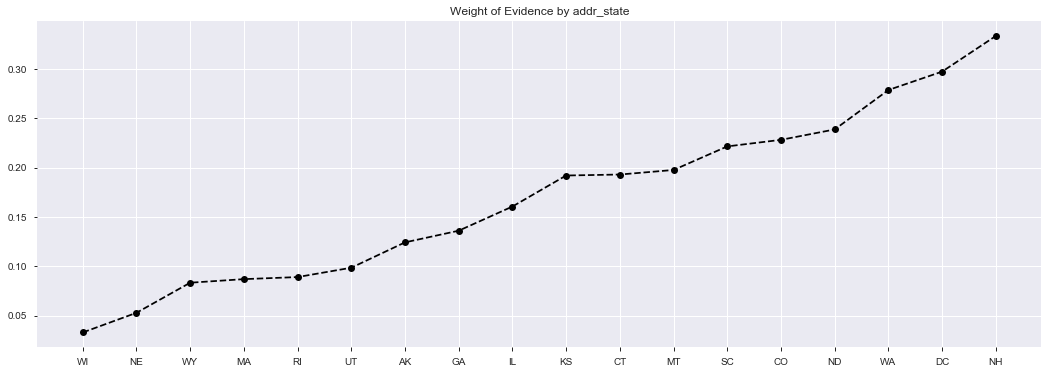

In [187]:
plot_by_woe(df_temp_3.iloc[28:46,:]) #7-9, 10-11, 12-15
# IA doesn't have enough to make the chart relavant

In [188]:
df_inputs_prepr['addr_state:OK_AR_LA_MS'] = sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:LA'],df_inputs_prepr['addr_state:MS']])
df_inputs_prepr['addr_state:NV_NY'] = sum([df_inputs_prepr['addr_state:NV'],df_inputs_prepr['addr_state:NY']])
df_inputs_prepr['addr_state:HI_FL_NM'] = sum([df_inputs_prepr['addr_state:HI'],df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:NM']])
df_inputs_prepr['addr_state:MD_MO_AK_PA_NC_NJ_IN'] = sum([df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:NC'],df_inputs_prepr['addr_state:NJ'],df_inputs_prepr['addr_state:IN']])
df_inputs_prepr['addr_state:KY_CA'] = sum([df_inputs_prepr['addr_state:KY'],df_inputs_prepr['addr_state:CA']])
df_inputs_prepr['addr_state:SD_NE_TN_MI_DE_VA'] = sum([df_inputs_prepr['addr_state:SD'],df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:TN'],df_inputs_prepr['addr_state:MI'],df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:VA']])
df_inputs_prepr['addr_state:MN_AZ_TX_OH'] = sum([df_inputs_prepr['addr_state:MN'],df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:TX'],df_inputs_prepr['addr_state:OH']])
df_inputs_prepr['addr_state:UT_GA_WI'] = sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WI']])
df_inputs_prepr['addr_state:IL_CT_RI_MT'] = sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT'],df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MT']])
df_inputs_prepr['addr_state:WY_KS_WA'] = sum([df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:WA']])
df_inputs_prepr['addr_state:ND_CO'] = sum([df_inputs_prepr['addr_state:ND'],df_inputs_prepr['addr_state:CO']])
df_inputs_prepr['addr_state:SC_OR_DC'] = sum([df_inputs_prepr['addr_state:SC'],df_inputs_prepr['addr_state:OR'],df_inputs_prepr['addr_state:DC']])

In [189]:
df_temp_4 = woe_discrete(df_inputs_prepr,'verification_status', df_targets_prepr)

In [190]:
df_temp_4

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  159860   0.822570    0.268137  131496.0  28364.0   
1     Source Verified  232445   0.863008    0.389885  200602.0  31843.0   
2        Not Verified  203883   0.908541    0.341978  185236.0  18647.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.254180    0.359703 -0.347235             NaN       NaN  0.087733  
1     0.387761    0.403822 -0.040585        0.040439   0.30665  0.087733  
2     0.358059    0.236475  0.414855        0.045532   0.45544  0.087733

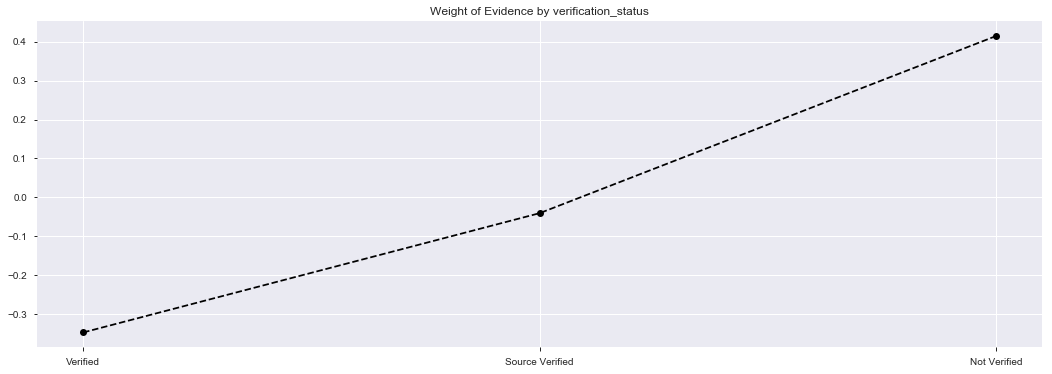

In [191]:
plot_by_woe(df_temp_4)

In [192]:
df_temp_5 = woe_discrete(df_inputs_prepr,'purpose', df_targets_prepr)

In [193]:
df_temp_5

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          educational     100   0.630000    0.000168      63.0     37.0   
1       small_business    6318   0.786958    0.010597    4972.0   1346.0   
2     renewable_energy     361   0.822715    0.000606     297.0     64.0   
3               moving    3946   0.833502    0.006619    3289.0    657.0   
4   debt_consolidation  335767   0.857431    0.563190  287897.0  47870.0   
5                other   36234   0.860628    0.060776   31184.0   5050.0   
6                house    3901   0.860805    0.006543    3358.0    543.0   
7              medical    6972   0.861015    0.011694    6003.0    969.0   
8             vacation    3953   0.863648    0.006630    3414.0    539.0   
9              wedding     588   0.867347    0.000986     510.0     78.0   
10      major_purchase   12962   0.869310    0.021741   11268.0   1694.0   
11    home_improvement   39295   0.884489    0.065910   34756.0   4539.0   
12         credit_card  139461   0.893554    0.233921  124616.0  14845.0   
13                 car    6330   0.901580    0.010617    5707.0    623.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000122    0.000469 -1.348874             NaN       NaN  0.025573  
1      0.009611    0.017070 -0.574406        0.156958  0.774468  0.025573  
2      0.000574    0.000812 -0.346242        0.035757  0.228164  0.025573  
3      0.006358    0.008332 -0.270436        0.010788  0.075806  0.025573  
4      0.556501    0.607071 -0.086977        0.023929  0.183459  0.025573  
5      0.060278    0.064042 -0.060574        0.003197  0.026403  0.025573  
6      0.006491    0.006886 -0.059099        0.000177  0.001475  0.025573  
7      0.011604    0.012289 -0.057341        0.000211  0.001758  0.025573  
8      0.006599    0.006835 -0.035166        0.002632  0.022174  0.025573  
9      0.000986    0.000989 -0.003389        0.003699  0.031778  0.025573  
10     0.021781    0.021483  0.013784        0.001963  0.017172  0.025573  
11     0.067183    0.057562  0.154555        0.015179  0.140771  0.025573  
12     0.240881    0.188259  0.246483        0.009065  0.091928  0.025573  
13     0.011032    0.007901  0.333812        0.008025  0.087328  0.025573

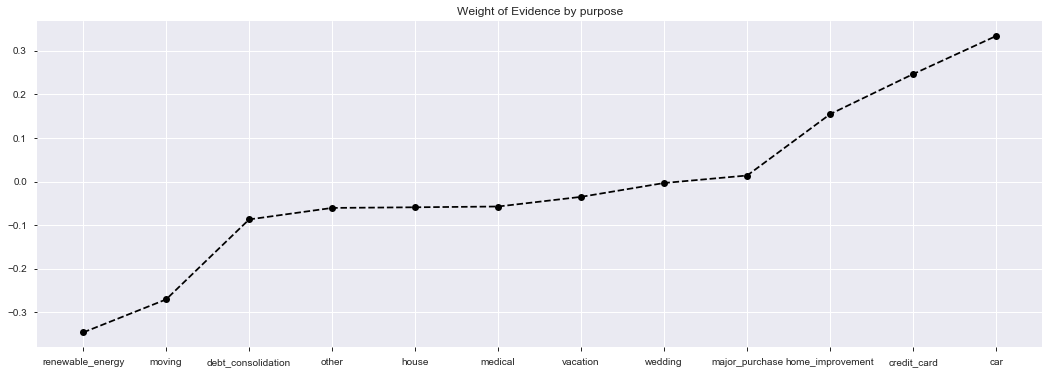

In [194]:
plot_by_woe(df_temp_5.iloc[2:,:])

In [195]:
df_inputs_prepr['purpose:MOV_REN'] = sum([df_inputs_prepr['purpose:moving'],df_inputs_prepr['purpose:renewable_energy']])
df_inputs_prepr['purpose:WED_DEBTCON_MEDICAL'] = sum([df_inputs_prepr['purpose:wedding'],df_inputs_prepr['purpose:debt_consolidation'],df_inputs_prepr['purpose:medical']])
df_inputs_prepr['purpose:OTH_HOUSE'] = sum([df_inputs_prepr['purpose:other'],df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:MAJPUR_VAC_HI'] = sum([df_inputs_prepr['purpose:major_purchase'],df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:home_improvement']])
df_inputs_prepr['purpose:CC_CAR'] = sum([df_inputs_prepr['purpose:credit_card'],df_inputs_prepr['purpose:car']])

In [196]:
df_temp_6 = woe_discrete(df_inputs_prepr,'initial_list_status', df_targets_prepr)

In [197]:
df_temp_6

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  182140   0.834073    0.305508  151918.0  30222.0   
1                   w  414048   0.882545    0.694492  365416.0  48632.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.293656    0.383265 -0.266320             NaN       NaN  0.036022  
1     0.706344    0.616735  0.135664        0.048472  0.401984  0.036022

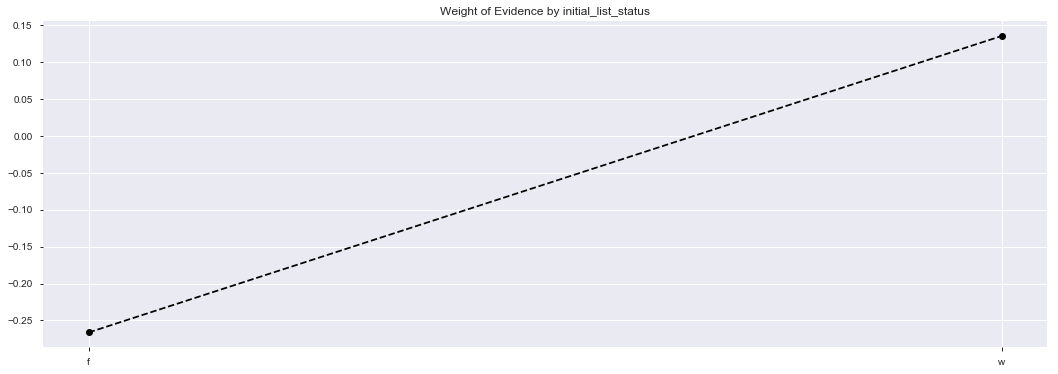

In [198]:
plot_by_woe(df_temp_6)

# WoE for continuous categories

In [199]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good']/ df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    # df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [200]:
df_temp_7 = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)

In [201]:
df_temp_7

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  422148   0.886800    0.708079  374361.0  47787.0     0.723635   
1        60  174040   0.821495    0.291921  142973.0  31067.0     0.276365   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.606019  0.177376             NaN       NaN  0.062567  
1    0.393981 -0.354581        0.065305  0.531957  0.062567

In [202]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int']==60),1,0)

In [203]:
df_temp_8 = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp_8

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   91639   0.857517    0.153708   78582.0  13057.0   
1              1.0   39278   0.864021    0.065882   33937.0   5341.0   
2              2.0   53442   0.865593    0.089640   46259.0   7183.0   
3              3.0   47506   0.867785    0.079683   41225.0   6281.0   
4              4.0   36279   0.870173    0.060852   31569.0   4710.0   
5              5.0   36801   0.866417    0.061727   31885.0   4916.0   
6              6.0   26829   0.870401    0.045001   23352.0   3477.0   
7              7.0   24226   0.861719    0.040635   20876.0   3350.0   
8              8.0   24066   0.858514    0.040366   20661.0   3405.0   
9              9.0   20083   0.860130    0.033686   17274.0   2809.0   
10            10.0  196039   0.875918    0.328821  171714.0  24325.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.151898    0.165584 -0.086272             NaN       NaN  0.003564  
1      0.065600    0.067733 -0.031998        0.006504  0.054275  0.003564  
2      0.089418    0.091092 -0.018552        0.001572  0.013446  0.003564  
3      0.079687    0.079654  0.000425        0.002193  0.018977  0.003564  
4      0.061022    0.059731  0.021397        0.002388  0.020972  0.003564  
5      0.061633    0.062343 -0.011450        0.003756  0.032847  0.003564  
6      0.045139    0.044094  0.023422        0.003985  0.034872  0.003564  
7      0.040353    0.042484 -0.051451        0.008683  0.074873  0.003564  
8      0.039937    0.043181 -0.078088        0.003205  0.026637  0.003564  
9      0.033390    0.035623 -0.064717        0.001616  0.013371  0.003564  
10     0.331921    0.308481  0.073235        0.015787  0.137952  0.003564

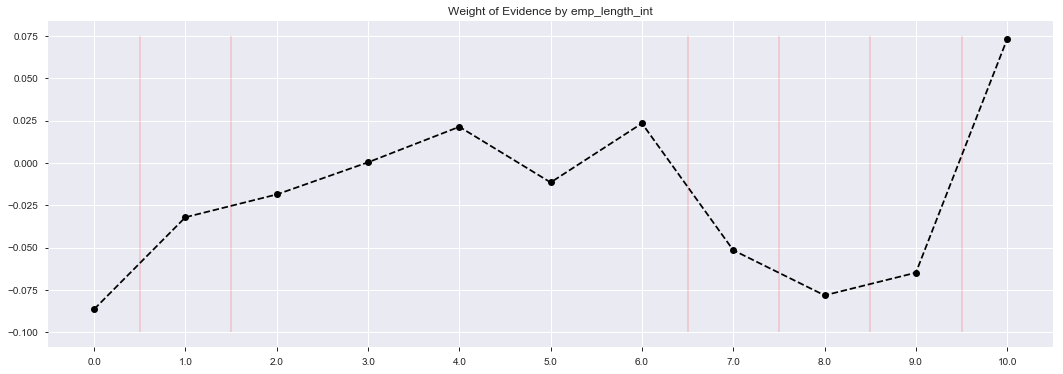

In [204]:
plot_by_woe(df_temp_8)
plt.vlines(0.5, ymin=-0.1, ymax=0.075,colors='r', alpha=0.15)
plt.vlines(1.5, ymin=-0.1, ymax=0.075,colors='r', alpha=0.15)
plt.vlines(6.5, ymin=-0.1, ymax=0.075,colors='r', alpha=0.15)
plt.vlines(7.5, ymin=-0.1, ymax=0.075,colors='r', alpha=0.15)
plt.vlines(8.5, ymin=-0.1, ymax=0.075,colors='r', alpha=0.15)
plt.vlines(9.5, ymin=-0.1, ymax=0.075,colors='r', alpha=0.15);

In [205]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,7)),1,0)
df_inputs_prepr['emp_length:7'] = np.where(df_inputs_prepr['emp_length_int'].isin([7]),1,0)
df_inputs_prepr['emp_length:8'] = np.where(df_inputs_prepr['emp_length_int'].isin([8]),1,0)
df_inputs_prepr['emp_length:9'] = np.where(df_inputs_prepr['emp_length_int'].isin([9]),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [206]:
df_inputs_prepr['mths_since_issue_d'].value_counts()

41.0     15527
46.0     12067
15.0     11621
10.0     11440
3.0      11419
49.0     11410
12.0     11348
44.0     11102
16.0     10896
4.0      10896
7.0      10835
13.0     10687
21.0     10648
9.0      10497
2.0      10442
14.0     10323
8.0      10238
42.0      9878
11.0      9856
26.0      9746
58.0      9733
17.0      9643
22.0      9610
20.0      9507
27.0      9459
45.0      9379
36.0      9246
29.0      9240
19.0      9155
40.0      9145
32.0      9076
6.0       9033
48.0      8930
55.0      8895
5.0       8881
52.0      8765
37.0      8717
33.0      8535
34.0      8232
38.0      8208
18.0      8149
31.0      8106
43.0      8104
51.0      8004
28.0      7457
61.0      7313
47.0      7140
50.0      7084
39.0      7054
35.0      6989
30.0      6849
53.0      6182
57.0      6123
54.0      5944
64.0      4733
63.0      4696
60.0      4667
62.0      4409
65.0      4136
67.0      3931
66.0      3815
69.0      3676
68.0      3647
70.0      3579
71.0      3229
72.0      3175
73.0      

In [207]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'],40)

In [222]:
#type(df_inputs_prepr['mths_since_issue_d'][0])

In [209]:
df_temp_9 = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp_9

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0               (1.856, 5.6]  41638   0.991258    0.069840  41274.0   364.0   
1                 (5.6, 9.2]  40603   0.969904    0.068104  39381.0  1222.0   
2                (9.2, 12.8]  32644   0.950925    0.054755  31042.0  1602.0   
3               (12.8, 16.4]  43527   0.922163    0.073009  40139.0  3388.0   
4               (16.4, 20.0]  36454   0.905278    0.061145  33001.0  3453.0   
5               (20.0, 23.6]  20258   0.887403    0.033979  17977.0  2281.0   
6               (23.6, 27.2]  19205   0.861078    0.032213  16537.0  2668.0   
7               (27.2, 30.8]  23546   0.850888    0.039494  20035.0  3511.0   
8               (30.8, 34.4]  33949   0.837285    0.056943  28425.0  5524.0   
9               (34.4, 38.0]  33160   0.814415    0.055620  27006.0  6154.0   
10              (38.0, 41.6]  31726   0.816743    0.053215  25912.0  5814.0   
11              (41.6, 45.2]  38463   0.813197    0.064515  31278.0  7185.0   
12              (45.2, 48.8]  28137   0.817074    0.047195  22990.0  5147.0   
13              (48.8, 52.4]  35263   0.807645    0.059147  28480.0  6783.0   
14              (52.4, 56.0]  23644   0.814879    0.039659  19267.0  4377.0   
15              (56.0, 59.6]  18538   0.817240    0.031094  15150.0  3388.0   
16              (59.6, 63.2]  21085   0.822196    0.035366  17336.0  3749.0   
17              (63.2, 66.8]  12684   0.829470    0.021275  10521.0  2163.0   
18              (66.8, 70.4]  14833   0.845615    0.024880  12543.0  2290.0   
19              (70.4, 74.0]  12130   0.845342    0.020346  10254.0  1876.0   
20              (74.0, 77.6]   7035   0.835394    0.011800   5877.0  1158.0   
21              (77.6, 81.2]   6767   0.847495    0.011350   5735.0  1032.0   
22              (81.2, 84.8]   4435   0.843743    0.007439   3742.0   693.0   
23              (84.8, 88.4]   3837   0.829554    0.006436   3183.0   654.0   
24              (88.4, 92.0]   2609   0.837486    0.004376   2185.0   424.0   
25              (92.0, 95.6]   1644   0.847324    0.002758   1393.0   251.0   
26              (95.6, 99.2]   1793   0.854992    0.003007   1533.0   260.0   
27             (99.2, 102.8]   1100   0.874545    0.001845    962.0   138.0   
28            (102.8, 106.4]   1266   0.823065    0.002123   1042.0   224.0   
29            (106.4, 110.0]   1185   0.790717    0.001988    937.0   248.0   
30            (110.0, 113.6]    647   0.809892    0.001085    524.0   123.0   
31            (113.6, 117.2]    684   0.792398    0.001147    542.0   142.0   
32            (117.2, 120.8]    378   0.791005    0.000634    299.0    79.0   
33            (120.8, 124.4]    366   0.778689    0.000614    285.0    81.0   
34            (124.4, 128.0]    281   0.779359    0.000471    219.0    62.0   
35            (128.0, 131.6]     97   0.701031    0.000163     68.0    29.0   
36            (131.6, 135.2]    120   0.558333    0.000201     67.0    53.0   
37            (135.2, 138.8]    244   0.479508    0.000409    117.0   127.0   
38            (138.8, 142.4]    173   0.381503    0.000290     66.0   107.0   
39            (142.4, 146.0]     40   0.250000    0.000067     10.0    30.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.079782    0.004616  2.849744             NaN       NaN  0.475205  
1      0.076123    0.015497  1.591704        0.021354  1.258040  0.475205  
2      0.060004    0.020316  1.082998        0.018979  0.508706  0.475205  
3      0.077588    0.042965  0.591018        0.028762  0.491980  0.475205  
4      0.063791    0.043790  0.376204        0.016885  0.214814  0.475205  
5      0.034749    0.028927  0.183389        0.017875  0.192815  0.475205  
6      0.031966    0.033835 -0.056819        0.026325  0.240208  0.475205  
7      0.038727    0.044525 -0.139511        0.010190  0.082691  0.475205  
8      0.054945    0.070054 -0.242924        0.013602  0.103413  0.475205  
9  

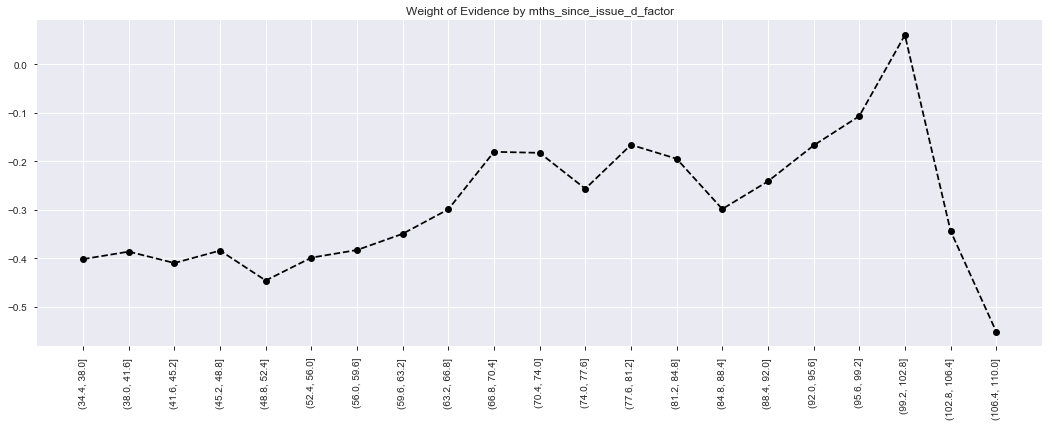

In [210]:
plot_by_woe(df_temp_9.iloc[9:30,:], 90)

In [211]:
df_inputs_prepr.int_rate.value_counts()

 11.99%    11513
 10.99%    10934
 13.99%    10762
  5.32%    10581
  8.19%     8481
 11.49%     8052
 16.99%     7666
 12.99%     7326
  7.89%     7083
  9.17%     6769
 15.61%     6280
 14.99%     6197
 13.49%     6036
 10.49%     5575
  9.99%     5446
  6.46%     4998
 18.99%     4954
  8.81%     4940
 12.74%     4921
 12.69%     4733
 12.29%     4713
 17.57%     4461
 11.44%     4445
 15.99%     4428
 13.56%     4419
 13.33%     4418
  8.18%     4370
 14.47%     4369
 17.97%     4312
 13.67%     4298
 20.00%     4297
 16.29%     4276
 10.33%     4266
 19.99%     4259
 15.31%     4168
 15.02%     4123
 14.49%     4096
 11.53%     4022
 10.42%     3995
  9.44%     3990
  9.93%     3871
 12.62%     3819
 18.25%     3801
  7.02%     3799
  8.39%     3774
  8.24%     3702
 14.65%     3655
  7.56%     3644
 16.14%     3594
 14.08%     3563
 11.55%     3543
 16.02%     3495
 15.05%     3483
 16.91%     3424
 13.59%     3400
  6.11%     3374
  7.21%     3292
 17.99%     3240
 12.40%     32

In [212]:
df_inputs_prepr['int_rate_factor'] = df_inputs_prepr['int_rate'].map(lambda x: x.rstrip('%').strip())
df_inputs_prepr['int_rate_factor'] = pd.to_numeric(df_inputs_prepr['int_rate_factor'])

In [213]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate_factor'],50)

In [214]:
df_temp_10 = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp_10

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.284, 5.824]  12940   0.976352    0.021705  12634.0   306.0   
1     (5.824, 6.337]  12236   0.975400    0.020524  11935.0   301.0   
2     (6.337, 6.851]  17084   0.974011    0.028655  16640.0   444.0   
3     (6.851, 7.364]  24097   0.961987    0.040418  23181.0   916.0   
4     (7.364, 7.878]  16691   0.959978    0.027996  16023.0   668.0   
5     (7.878, 8.392]  39218   0.938778    0.065781  36817.0  2401.0   
6     (8.392, 8.905]  13299   0.954057    0.022307  12688.0   611.0   
7     (8.905, 9.419]  11411   0.896679    0.019140  10232.0  1179.0   
8     (9.419, 9.932]  21396   0.919191    0.035888  19667.0  1729.0   
9    (9.932, 10.446]  21303   0.929963    0.035732  19811.0  1492.0   
10   (10.446, 10.96]  21492   0.909176    0.036049  19540.0  1952.0   
11   (10.96, 11.473]  30848   0.896719    0.051742  27662.0  3186.0   
12  (11.473, 11.987]  24899   0.896743    0.041764  22328.0  2571.0   
13    (11.987, 12.5]  28099   0.875013    0.047131  24587.0  3512.0   
14    (12.5, 13.014]  31872   0.858120    0.053460  27350.0  4522.0   
15  (13.014, 13.528]  20273   0.844078    0.034004  17112.0  3161.0   
16  (13.528, 14.041]  32735   0.850924    0.054907  27855.0  4880.0   
17  (14.041, 14.555]  23525   0.855983    0.039459  20137.0  3388.0   
18  (14.555, 15.068]  22799   0.848546    0.038241  19346.0  3453.0   
19  (15.068, 15.582]   9267   0.842991    0.015544   7812.0  1455.0   
20  (15.582, 16.096]  20699   0.797430    0.034719  16506.0  4193.0   
21  (16.096, 16.609]  16087   0.822528    0.026983  13232.0  2855.0   
22  (16.609, 17.123]  14339   0.805286    0.024051  11547.0  2792.0   
23  (17.123, 17.636]  11511   0.779863    0.019308   8977.0  2534.0   
24   (17.636, 18.15]  13671   0.813547    0.022931  11122.0  2549.0   
25   (18.15, 18.664]   9540   0.722013    0.016002   6888.0  2652.0   
26  (18.664, 19.177]  11669   0.776416    0.019573   9060.0  2609.0   
27  (19.177, 19.691]   6012   0.726547    0.010084   4368.0  1644.0   
28  (19.691, 20.204]  12508   0.810441    0.020980  10137.0  2371.0   
29  (20.204, 20.718]   2646   0.760393    0.004438   2012.0   634.0   
30  (20.718, 21.232]   5642   0.746721    0.009463   4213.0  1429.0   
31  (21.232, 21.745]   3914   0.714870    0.006565   2798.0  1116.0   
32  (21.745, 22.259]   3172   0.693569    0.005320   2200.0   972.0   
33  (22.259, 22.772]   5314   0.798457    0.008913   4243.0  1071.0   
34  (22.772, 23.286]   2210   0.639367    0.003707   1413.0   797.0   
35    (23.286, 23.8]   2207   0.788854    0.003702   1741.0   466.0   
36    (23.8, 24.313]   3152   0.657678    0.005287   2073.0  1079.0   
37  (24.313, 24.827]   2005   0.712219    0.003363   1428.0   577.0   
38   (24.827, 25.34]   3572   0.724804    0.005991   2589.0   983.0   
39   (25.34, 25.854]   2388   0.642379    0.004005   1534.0   854.0   
40  (25.854, 26.368]   2112   0.684186    0.003543   1445.0   667.0   
41  (26.368, 26.881]    850   0.700000    0.001426    595.0   255.0   
42  (26.881, 27.395]   1136   0.767606    0.001905    872.0   264.0   
43  (27.395, 27.908]    273   0.538462    0.000458    147.0   126.0   
44  (27.908, 28.422]    211   0.488152    0.000354    103.0   108.0   
45  (28.422, 28.936]   1606   0.794521    0.002694   1276.0   330.0   
46  (28.936, 29.449]    110   0.663636    0.000185     73.0    37.0   
47  (29.449, 29.963]    535   0.646729    0.000897    346.0   189.0   
48  (29.963, 30.476]    356   0.657303    0.000597    234.0   122.0   
49   (30.476, 30.99]   1257   0.640414    0.002108    805.0   452.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.024421    0.003881  1.839471             NaN       NaN  0.465705  
1      0.023070    0.003817  1.799030        0.000952  0.040441  0.465705  
2      0.032165    0.005631  1.742649        0.001390  0.056380  0.465705  
3      0.044809    0.011616  1.349981        0.012024  0.392668  0.465705  
4  

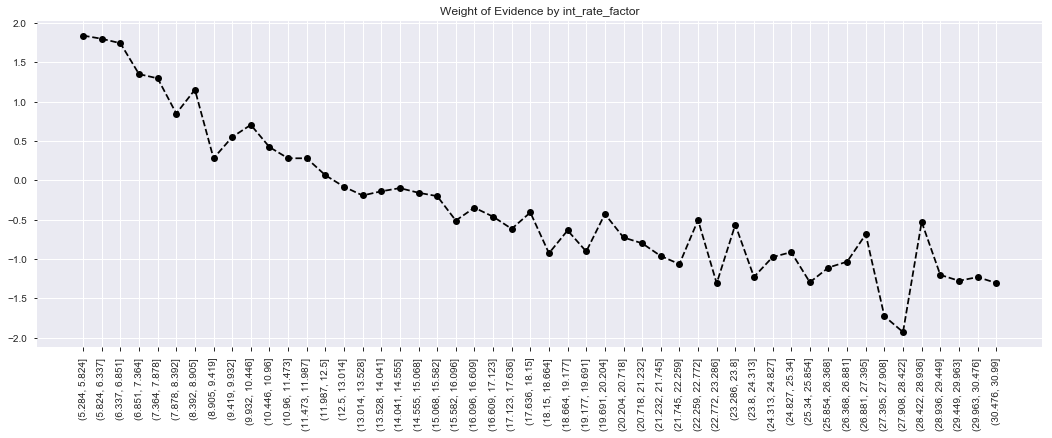

In [215]:
plot_by_woe(df_temp_10, 90)

In [216]:
df_inputs_prepr.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
560978  62236391    35000.0      35000.0          35000.0   36 months   

       int_rate  installment grade sub_grade                 emp_title  \
560978    9.99%      1129.19     B        B3  Production Stage Manager   

       emp_length home_ownership  annual_inc verification_status   issue_d  \
560978  10+ years           RENT     75000.0     Source Verified  Oct-2015   

       loan_status pymnt_plan             purpose               title  \
560978  Fully Paid          n  debt_consolidation  Debt consolidation   

       zip_code addr_state   dti  delinq_2yrs earliest_cr_line  \
560978    402xx         KY  18.5          0.0         Feb-1983   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
560978             0.0                     NaN                     NaN   

        open_acc  pub_rec  revol_bal revol_util  total_acc  \
560978      10.0      0.0    43233.0      75.3%       19.0   

       initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
560978                   f        0.0            0.0  40485.617879   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
560978         40485.62          35000.0        5485.62                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
560978         0.0                      0.0     Oct-2018          1129.08   

       next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
560978          NaN           Aug-2019                         0.0   

        mths_since_last_major_derog  policy_code application_type  \
560978                          NaN          1.0       Individual   

        annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
560978               NaN        NaN                       NaN             0.0   

       tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m  \
560978            0       43233         NaN         NaN         NaN   

       open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m  \
560978         NaN                NaN          NaN     NaN         NaN   

       open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl  \
560978         NaN        NaN      NaN            57400    NaN         NaN   

       inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util  \
560978          NaN                    1        4323          10296    77.8   

        chargeoff_within_12_mths  delinq_amnt mo_sin_old_il_acct  \
560978                       0.0          0.0                140   

       mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc  \
560978                  392                    18             18        0   

       mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq  \
560978                   18                      NaN                    18   

       mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl  \
560978                            NaN                     0              7   

       num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl  \
560978               8           8        11         1            10   

       num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m  \
560978            18                   8       10                0   

       num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  \
560978            0                  0                  0            100   

       percent_bc_gt_75  pub_rec_bankruptcies  tax_liens tot_hi_cred_lim  \
560978             62.5                   0.0        0.0           57400   

       total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
560978             43233          46300                          0   

        revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths  \
560978              NaN                      NaN                    NaN   

       sec_

In [217]:
df_inputs_prepr.shape

(596188, 302)

In [218]:
# loan_data_input_train = df_inputs_prepr
loan_data_input_test = df_inputs_prepr

In [223]:
#loan_data_input_train.to_csv('loan_data_inputs_train.csv')
#loan_data_target_train.to_csv('loan_data_target_train.csv')
#loan_data_input_test.to_csv('loan_data_inputs_test.csv')
#loan_data_target_test.to_csv('loan_data_target_test.csv')

# Here is the Description of the info in the merged dataframe





t


In [17]:
info = pd.read_csv('LCDataDictionary.csv/browseNotes-Table 1.csv')

In [27]:
info = info.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4', 'Unnamed: 5'], axis=1)

In [44]:
pd.options.display.max_rows = None

In [60]:
pd.set_option('max_colwidth', 5000)

In [62]:
info.head(30)

BrowseNotesFile  \
0                      acceptD   
1                 accNowDelinq   
2            accOpenPast24Mths   
3                    addrState   
4                     all_util   
5             annual_inc_joint   
6                    annualInc   
7             application_type   
8                  avg_cur_bal   
9                  bcOpenToBuy   
10                      bcUtil   
11    chargeoff_within_12_mths   
12  collections_12_mths_ex_med   
13                 creditPullD   
14                  delinq2Yrs   
15                  delinqAmnt   
16                        desc   
17                         dti   
18                   dti_joint   
19              earliestCrLine   
20          effective_int_rate   
21                   emp_title   
22                   empLength   
23                        expD   
24              expDefaultRate   
25               ficoRangeHigh   
26                ficoRangeLow   
27                  fundedAmnt   
28                       grade   
29               homeOwnership   

                                                                                                                                                                                                           Description  
0                                                                                                                                                                      The date which the borrower accepted  the offer  
1                                                                                                                                                      The number of accounts on which the borrower is now delinquent.  
2                                                                                                                                                                           Number of trades opened in past 24 months.  
3                                                                                                                                                           The state provided by the borrower in the loan application  
4                                                                                                                                                                                Balance to credit limit on all trades  
5                                                                                                                            The combined self-reported annual income provided by the co-borrowers during registration  
6                                                                                                                                        The self-reported annual income provided by the borrower during registration.  
7                                                                                                                 Indicates whether the loan is an individual application or a joint application with two co-borrowers  
8                                                                                                                                                                              Average current balance of all accounts  
9                                                                                                                                                                            Total open to buy on revolving bankcards.  
10                                                                                                                               Ratio of total current balance to high credit/credit limit for all bankcard accounts.  
11                                                                                                                                                                              Number of charge-offs within 12 months  
12                                                                                                                                         

# Test Matrix to make sure I know how to do some preprocessing on a smaller file than the overall dataset

In [197]:
test_matrix = pd.DataFrame()

In [198]:
test_matrix = df[['loan_amnt','funded_amnt','int_rate','term','home_ownership']]
test_matrix = test_matrix.iloc[:1000,:]

In [199]:
explore_data(test_matrix)

The number of rows is 1,000 and the number of columns is 5


In [200]:
test_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
loan_amnt         1000 non-null object
funded_amnt       1000 non-null object
int_rate          1000 non-null object
term              1000 non-null object
home_ownership    1000 non-null object
dtypes: object(5)
memory usage: 39.1+ KB


In [191]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables=['home_ownership','int_rate'], # Can select which variables to encode
    drop_last=False)

In [192]:
tmp = ohe_enc.fit_transform(test_matrix)
# note that this is to replace doing a get_dummies and then concatenating onto parent dataframe
# should be a more robust pipeline creation methodology

In [193]:
tmp.head(1)

loan_amnt funded_amnt        term  home_ownership_RENT  home_ownership_OWN  \
0      5000        5000   36 months                    1                   0   

   home_ownership_MORTGAGE  int_rate_ 10.65%  int_rate_ 15.27%  \
0                        0                 1                 0   

   int_rate_ 15.96%  int_rate_ 13.49%  int_rate_ 12.69%  int_rate_  7.90%  \
0                 0                 0                 0                 0   

   int_rate_ 18.64%  int_rate_ 21.28%  int_rate_ 14.65%  int_rate_  9.91%  \
0                 0                 0                 0                 0   

   int_rate_ 16.29%  int_rate_  6.03%  int_rate_ 11.71%  int_rate_ 12.42%  \
0                 0                 0                 0                 0   

   int_rate_ 14.27%  int_rate_ 16.77%  int_rate_  7.51%  int_rate_  8.90%  \
0                 0                 0                 0                 0   

   int_rate_ 18.25%  int_rate_  6.62%  int_rate_ 19.91%  int_rate_ 17.27%  \
0                 0                 0                 0                 0   

   int_rate_ 17.58%  int_rate_ 21.67%  int_rate_ 19.42%  int_rate_ 22.06%  \
0                 0                 0                 0                 0   

   int_rate_ 20.89%  int_rate_ 20.30%  int_rate_ 23.91%  int_rate_ 19.03%  \
0                 0                 0                 0                 0   

   int_rate_ 23.52%  int_rate_ 23.13%  int_rate_ 22.74%  int_rate_ 22.35%  
0                 0                 0                 0                 0

In [12]:
test_matrix_dummies = pd.get_dummies(test_matrix['home_ownership'])

In [13]:
test_matrix_dummies.head(2)

MORTGAGE  OWN  RENT
0         0    0     1
1         0    0     1

In [14]:
test_matrix.shape

(1000, 5)

In [15]:
test_matrix_dummies.shape

(1000, 3)

In [16]:
test_matrix = pd.concat([test_matrix,test_matrix_dummies], axis=1)

In [17]:
test_matrix.head(2)

loan_amnt funded_amnt int_rate        term home_ownership  MORTGAGE  OWN  \
0      5000        5000   10.65%   36 months           RENT         0    0   
1      2500        2500   15.27%   60 months           RENT         0    0   

   RENT  
0     1  
1     1

In [18]:
test_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
loan_amnt         1000 non-null object
funded_amnt       1000 non-null object
int_rate          1000 non-null object
term              1000 non-null object
home_ownership    1000 non-null object
MORTGAGE          1000 non-null uint8
OWN               1000 non-null uint8
RENT              1000 non-null uint8
dtypes: object(5), uint8(3)
memory usage: 42.1+ KB


In [195]:
# test_matrix['int_rate'] = test_matrix['int_rate'].str.rstrip('%').astype(float) / 100.0
# df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float) / 100.0

In [196]:
test_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
loan_amnt         1000 non-null object
funded_amnt       1000 non-null object
int_rate          1000 non-null float64
term              1000 non-null object
home_ownership    1000 non-null object
dtypes: float64(1), object(4)
memory usage: 39.1+ KB


In [46]:
test_matrix.int_rate.head(3)

0    0.1065
1    0.1527
2    0.1596
Name: int_rate, dtype: float64

In [201]:
test_matrix['loan_amnt'] = pd.to_numeric(test_matrix['loan_amnt'])
test_matrix['funded_amnt'] = pd.to_numeric(test_matrix['funded_amnt'])
test_matrix['int_rate'] = test_matrix['int_rate'].str.rstrip('%').astype(float) / 100
test_matrix['term_int'] = test_matrix['term'].str.replace(' months','')
test_matrix['term_int'] = pd.to_numeric(test_matrix['term_int'])

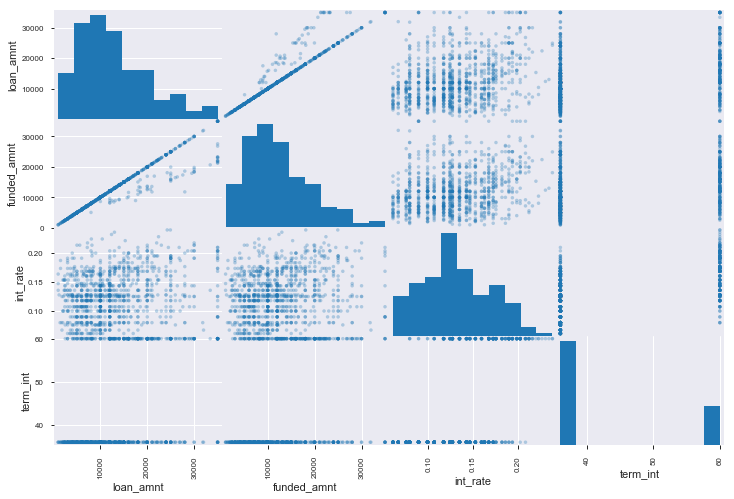

In [45]:
pd.plotting.scatter_matrix(test_matrix, figsize=(12,8), alpha=0.3);

In [22]:
df.columns[:10]
# what is difference bw funded_amnt and funded_amnt_inv? Looks like when did not get total funding
# grade vs sub_grade? much more detail in sub_grade - may not need grade

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade'],
      dtype='object')

In [23]:
df.columns[10:20]
# can prob drop emp_title; need to clean up emp_length
# one hot encode home_ownership
# what are unique verification_status
# one hot for loan_status
# how are pymnt_plan loans performing? could be interesting subsect
# is purpose relevant? keep for now but could drop - self reported data

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title'],
      dtype='object')

In [24]:
df.columns[20:30]
# dti is debt excl mortgage to self reported income
# delinq_2yrs is num of 30+ days past-due incidences of delinq in the borrower's credit file for the past 2 years

Index(['zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record'],
      dtype='object')

In [25]:
df.columns[30:40]
# open_acc is number of open credit lines
# pub_rec is num of neg public records
# ini_l_s is the initial listing status of the loan
# out_prncp is the outstanding principal for total amount funded

Index(['open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv'],
      dtype='object')

In [26]:
df.columns[40:50]
# last_pymnt_d is last month payment was received
# last_credit_pull_d is last month credit was pulled for this loan

Index(['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high'],
      dtype='object')

In [27]:
df.columns[50:60]
# coll_ex_med could be interesting to compare to others - is it really relevant though?
# policy_code may not matter
# app_type is either indv or co-borrower
# 

Index(['last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')

In [28]:
df.columns[60:70]
# open_acc_6m is num of open trades in last 6 months
# open_il is number of installment accounts
# open_rv is number of revolving trades

Index(['tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m'],
      dtype='object')

In [29]:
df.columns[70:80]
# max_bal_bc is max current balance on all revolving accounts
# total_cu_tl is total number of finance trades
# bc_open_to_buy is total open to buy on revolving bankcards

Index(['max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util'],
      dtype='object')

In [30]:
df.columns[80:90]
# mo_sin_rcnt_rev_tl_op is months since oldest revolving account opened

Index(['chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq'],
      dtype='object')

In [31]:
df.columns[90:100]

Index(['mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0'],
      dtype='object')

In [32]:
df.columns[100:110]

Index(['num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim'],
      dtype='object')

In [33]:
df.columns[110:120]

Index(['total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc'],
      dtype='object')

In [34]:
df.columns[120:130]

Index(['sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status'],
      dtype='object')

In [35]:
df.columns[130:140]

Index(['deferral_term', 'hardship_amount', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
       'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount'],
      dtype='object')

In [36]:
df.columns[140:]

Index(['hardship_last_payment_amount', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object')